**1. Import libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

In [ ]:
import graphviz
from sklearn import tree
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

**2. Load Dataset**

In [ ]:
df = pd.read_csv("/kaggle/input/imbd-top-1000")
df.head()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv')

In [ ]:
print('The dataset is successfully loaded')
print("The shape of the dataset is: {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset is successfully loaded
The shape of the dataset is: 1000 rows and 16 columns


In [ ]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
print(df.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


**3. Data Preprocesing**

In [ ]:
print(df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


*Rename column appropriately*

In [ ]:
df = df.rename(columns={'Series_Title': 'Movie_Title'})
display(df['Movie_Title'])

,Movie_Title
0,The Shawshank Redemption
1,The Godfather
2,The Dark Knight
3,The Godfather: Part II
4,12 Angry Men
...,...
995,Breakfast at Tiffany's
996,Giant
997,From Here to Eternity
998,Lifeboat


*Find missing values*


In [ ]:
df.isnull().sum()

,0
Poster_Link,0
Movie_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


*Handle missing values*
  

*   Certificate










In [ ]:
df_certificate = 'Not Rated'
if df['Certificate'].mode().empty:
    df_certificate = 'Not Rated'
df['Certificate'] = df['Certificate'].fillna(df_certificate)



*   Gross




In [ ]:
df['Gross'] = df['Gross'].fillna(0)



*   Meta score




In [ ]:
df['Meta_score'] = df['Meta_score'].fillna(0)

In [ ]:
#verify there is no null values
df.isnull().sum()

,0
Poster_Link,0
Movie_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


**4. Data Transformation and Reduction**

*Certificate column standarization*

In [ ]:
print(df['Certificate'].value_counts())

Certificate
U            234
A            197
UA           175
R            146
Not Rated    101
PG-13         43
PG            37
Passed        34
G             12
Approved      11
TV-PG          3
GP             2
TV-14          1
Unrated        1
TV-MA          1
16             1
U/A            1
Name: count, dtype: int64


In [ ]:
certificate_map = {
    'U': 'U',
    'U/A': 'UA',
    'UA': 'UA',
    'A': 'A',
    'R': 'R',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'G': 'G',
    'TV-PG': 'PG',
    'TV-14': 'PG-13',
    'TV-MA': 'R',
    'Passed': 'U',
    'Approved': 'U',
    'GP': 'PG',
    'Unrated': 'Not Rated',
    '16': 'Not Rated',
    'Not Rated': 'Not Rated'
}


# Convert all values to strings (avoid NaN issues)
df['Certificate'] = df['Certificate'].astype(str).str.strip()

df['Certificate'] = df['Certificate'].replace(certificate_map)

# Verify unique cleaned values
print(df['Certificate'].value_counts().sort_index())

Certificate
A            197
G             12
Not Rated    103
PG            42
PG-13         44
R            147
U            279
UA           176
Name: count, dtype: int64


*Runtime column formatted correctly*

In [ ]:
# Convert to string, remove ' min'
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)

# Convert to float
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

print(df['Runtime'])


0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64


*Release year column in correct date format*

In [ ]:
# Convert to numeric, invalid parsing will become NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

print(df['Released_Year'])

0      1994.0
1      1972.0
2      2008.0
3      1974.0
4      1957.0
        ...  
995    1961.0
996    1956.0
997    1953.0
998    1944.0
999    1935.0
Name: Released_Year, Length: 1000, dtype: float64


*Gross column in correct numeric format*

In [ ]:
# remove commas in the value and store as float
df['Gross'] = df['Gross'].replace(',', '', regex=True).astype(float)
print(df['Gross'])

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            0.0
996            0.0
997     30500000.0
998            0.0
999            0.0
Name: Gross, Length: 1000, dtype: float64


**5. Feature Enginnering**

*Profit Ratio*

In [ ]:
# convert gross value to numeric
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# create Profit Ratio
df['Profit_Ratio'] = df['Gross'] / df['No_of_Votes']


print(df[['Movie_Title','Gross','No_of_Votes','Profit_Ratio']].head(3))

                Movie_Title        Gross  No_of_Votes  Profit_Ratio
0  The Shawshank Redemption   28341469.0      2343110     12.095663
1             The Godfather  134966411.0      1620367     83.293730
2           The Dark Knight  534858444.0      2303232    232.220829


*Decade of release*

In [ ]:
# Compute decade
df['Decade'] = (df['Released_Year'] // 10 * 10).astype('Int64')

print(df[['Movie_Title','Released_Year','Decade']].head(3))

                Movie_Title  Released_Year  Decade
0  The Shawshank Redemption         1994.0    1990
1             The Godfather         1972.0    1970
2           The Dark Knight         2008.0    2000


*Movie's Age*


In [ ]:
from datetime import datetime
# Get the current year
current_year = datetime.now().year

# Create Movie_Age feature
df['Movie_Age'] = current_year - df['Released_Year']

print(df[['Movie_Title', 'Released_Year', 'Movie_Age']].head(3))

                Movie_Title  Released_Year  Movie_Age
0  The Shawshank Redemption         1994.0       31.0
1             The Godfather         1972.0       53.0
2           The Dark Knight         2008.0       17.0


*Long Runtime*

In [ ]:
#find long runtime
df['long_runtime'] = np.where(df['Runtime'] > 150, 'Yes', 'No')

print(df[['Movie_Title','Runtime','long_runtime']].head(3))

                Movie_Title  Runtime long_runtime
0  The Shawshank Redemption      142           No
1             The Godfather      175          Yes
2           The Dark Knight      152          Yes


**6. Data Visulaization**

In [ ]:
sns.set(style="whitegrid")

*Top Movies by Gross*

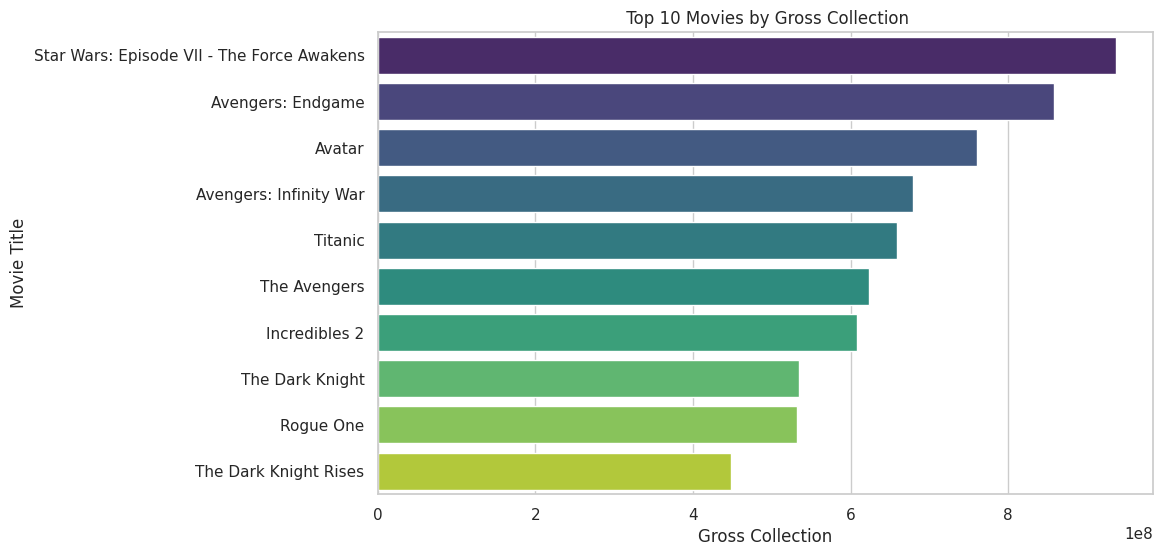

In [ ]:
plt.figure(figsize=(10,6))
top_gross = df.sort_values(by='Gross', ascending=False).head(10)

sns.barplot(
    y='Movie_Title',
    x='Gross',
    data=top_gross,
    hue='Movie_Title',
    palette='viridis',
    legend=False
)
plt.title(' Top 10 Movies by Gross Collection')
plt.xlabel('Gross Collection')
plt.ylabel('Movie Title')
plt.show()

*Maximum Movies Released In (Year Distribution)*

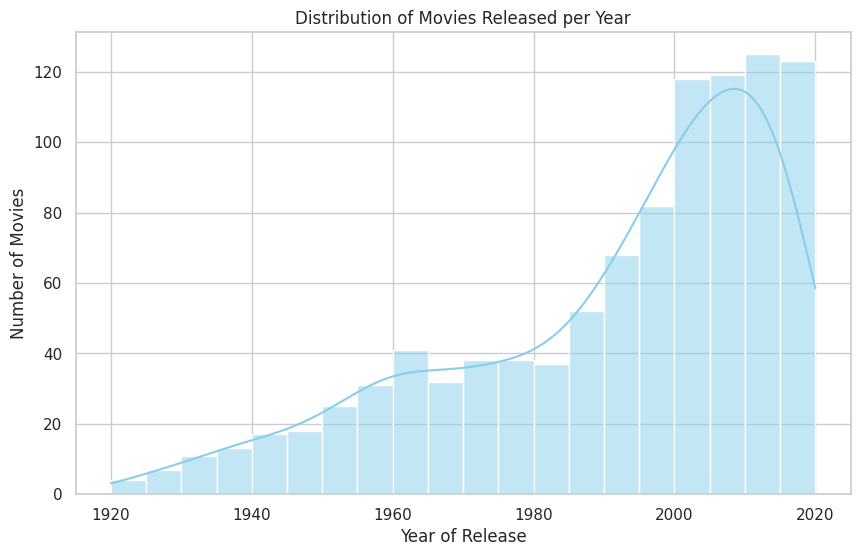

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Released_Year'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Movies Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.show()


*Mostly Occurred Directors*

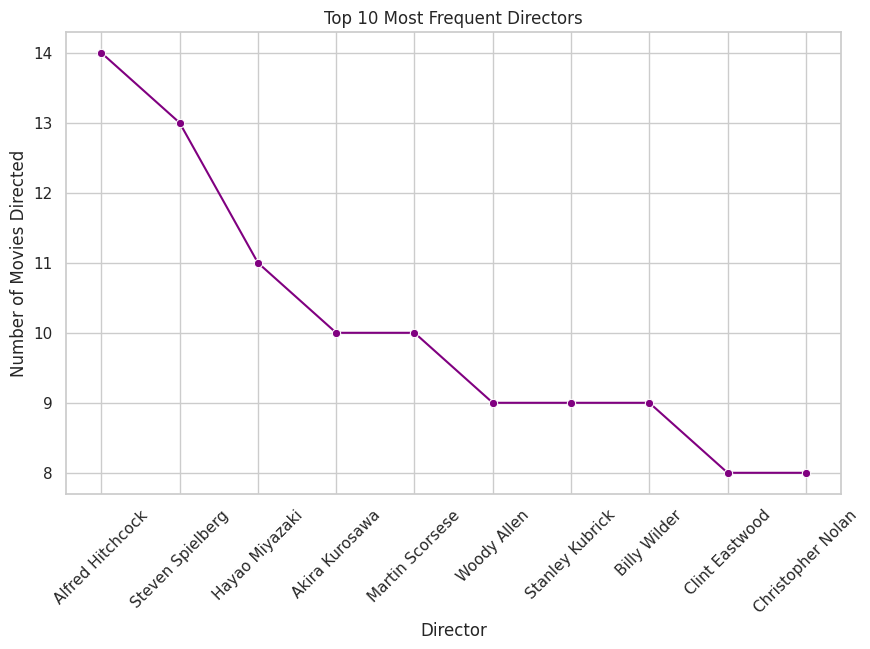

In [ ]:
plt.figure(figsize=(10,6))
director_counts = df['Director'].value_counts().head(10)

sns.lineplot(
    x=director_counts.index,
    y=director_counts.values,
    marker='o',
    color='purple'
)
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=45)
plt.show()


*Directors with respect to Gross of the movies*

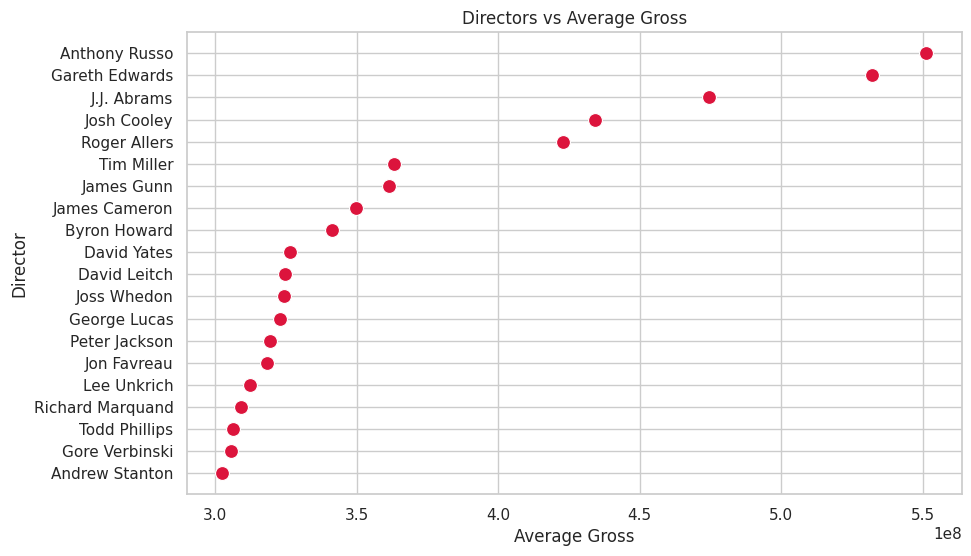

In [ ]:
plt.figure(figsize=(10,6))
top_directors = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(20).reset_index()
sns.scatterplot(x='Gross', y='Director', data=top_directors, s=100, color='crimson')
plt.title('Directors vs Average Gross')
plt.xlabel('Average Gross')
plt.ylabel('Director')
plt.show()

Stars with most Occurences in movies

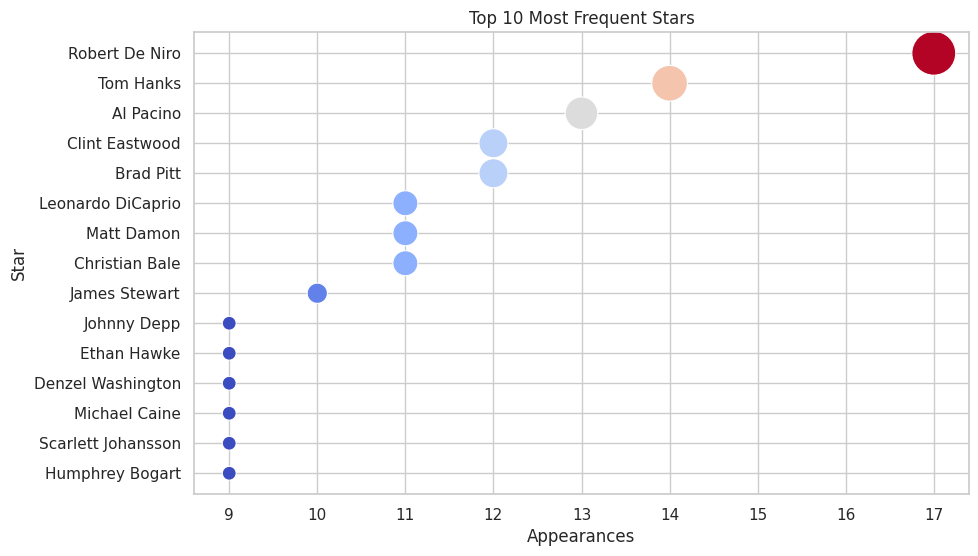

In [ ]:
all_stars = df[['Star1', 'Star2', 'Star3','Star4']].values.flatten()
star_counts = pd.Series(all_stars).value_counts().head(15).reset_index()
star_counts.columns = ['Star', 'Count']

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=star_counts,
    x='Count',
    y='Star',
    size='Count',
    hue='Count',
    palette='coolwarm',
    sizes=(100,1000),
    legend=False
)
plt.title('Top 10 Most Frequent Stars')
plt.xlabel('Appearances')
plt.ylabel('Star')
plt.show()

*IMDB Rating Distribution*

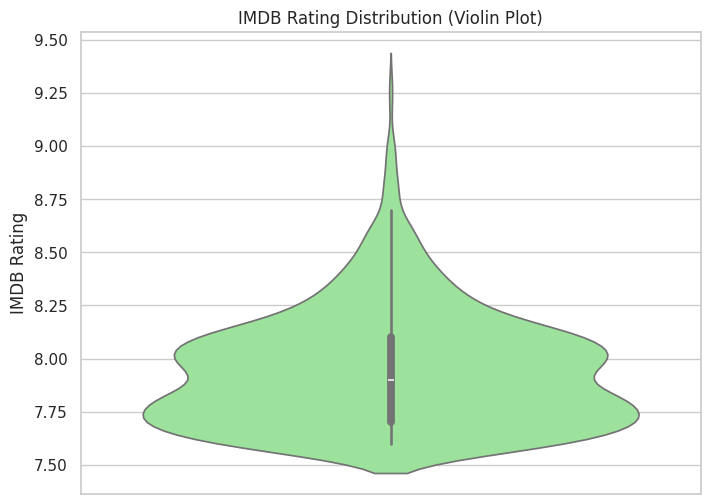

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(y='IMDB_Rating', data=df, color='lightgreen')
plt.title('IMDB Rating Distribution (Violin Plot)')
plt.ylabel('IMDB Rating')
plt.show()

*Top 10 Genres*

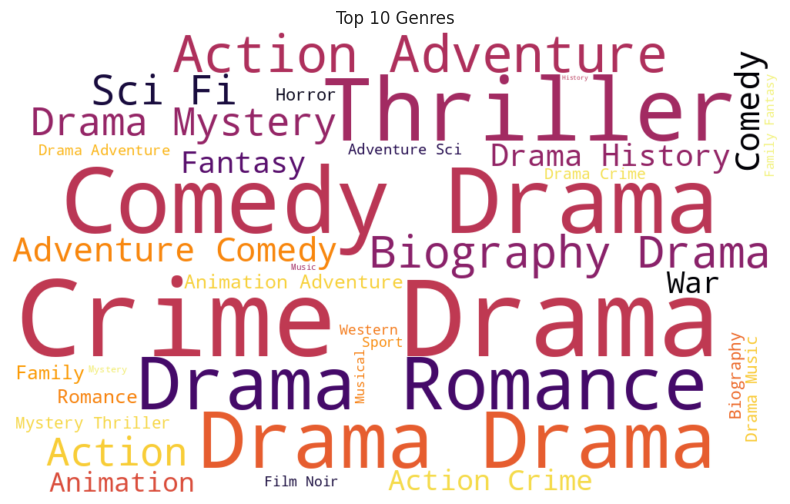

In [ ]:
genres_text = " ".join(df['Genre'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='inferno').generate(genres_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Genres')
plt.show()

*Count of Certificates provided*

/tmp/ipython-input-248781242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


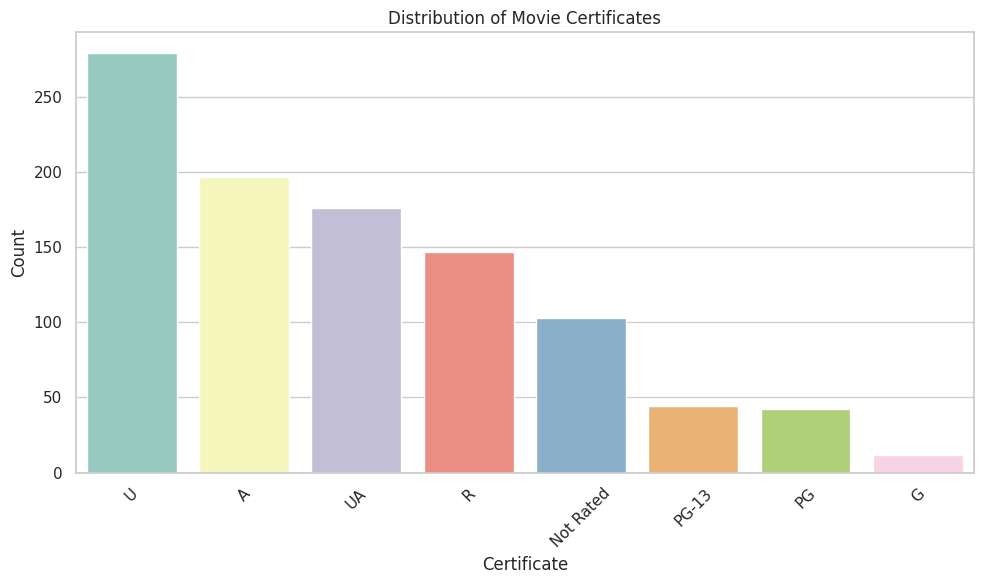

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    x='Certificate',
    data=df,
    order=df['Certificate'].value_counts().index,
    palette='Set3'
)

plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Appearances of Stars in Top voted movies*

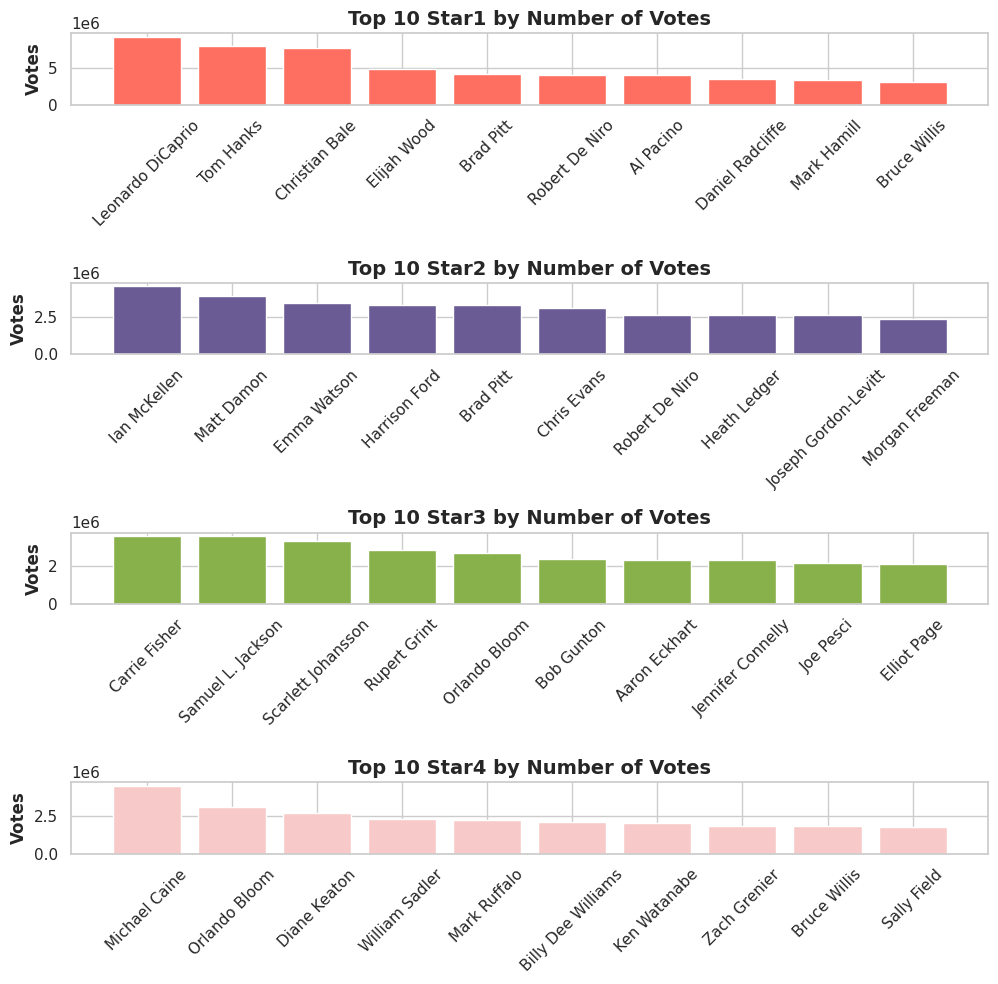

In [ ]:
stars = ['Star1', 'Star2', 'Star3', 'Star4']

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

for i, star in enumerate(stars):
    s = df.groupby(star).sum(numeric_only=True).reset_index()
    d = s.sort_values(['No_of_Votes'], ascending=False)[:10]  # top 10
    axs[i].bar(d[star], d['No_of_Votes'], color=colors[i])
    axs[i].set_title(f'Top 10 {star} by Number of Votes', fontsize=14, weight='bold')
    axs[i].set_ylabel("Votes", weight="bold")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

*Finding Correlation Matix as a heatmap*

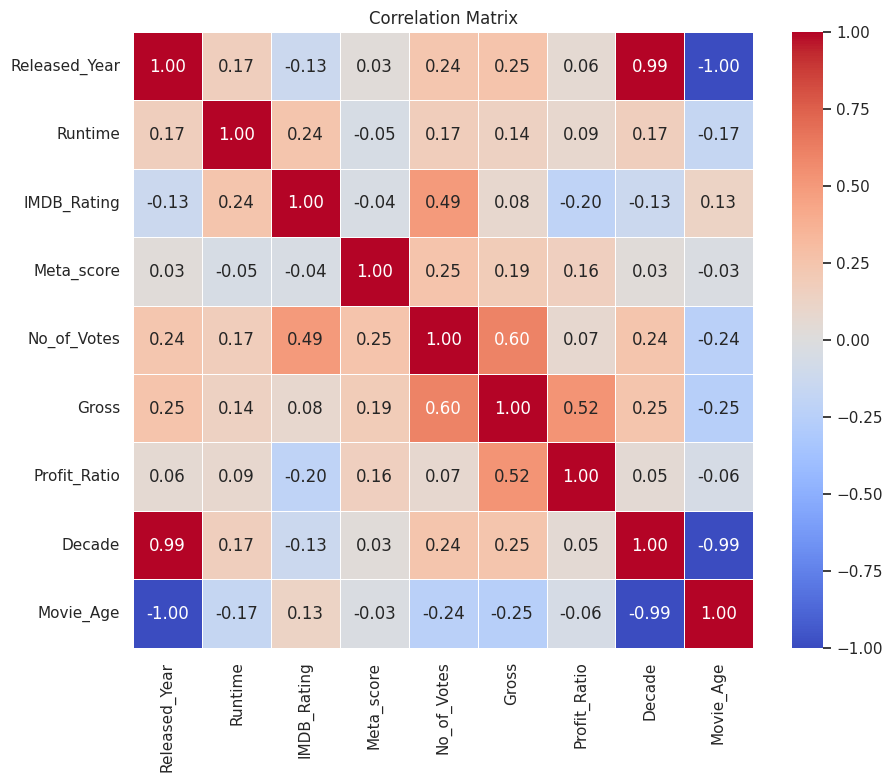

In [ ]:
# Compute correlation matrix (only numeric columns)
corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**7. Movie Recommendation System**

In [ ]:
# For the recommendation system, we use a content-based approach

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# handle inconsistent values
df['Genre'] = df['Genre'].fillna('')
df['Overview'] = df['Overview'].fillna('')

df['combined_features'] = df['Genre'] + ' ' + df['Overview']

# Create a TF-IDF Vectorizer to convert text data into a matrix of TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (1000, 5430)


In [ ]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

print("Cosine similarity matrix shape:", cosine_sim.shape)

Cosine similarity matrix shape: (1000, 1000)


In [ ]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim, df=df):
    indices = pd.Series(df.index, index=df['Movie_Title']).drop_duplicates()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]


    return df['Movie_Title'].iloc[movie_indices]

In [ ]:
# example: the first movie in the dataframe
sample_movie = df['Movie_Title'].iloc[0]
print(f"Recommendations for '{sample_movie}':")

display(get_recommendations(sample_movie))

Recommendations for 'The Shawshank Redemption':


,Movie_Title
350,Dev.D
68,Oldeuboi
179,The Great Escape
868,Rebel Without a Cause
253,Fa yeung nin wah
197,Koe no katachi
683,The Breakfast Club
801,Happiness
368,Casino Royale
699,Midnight Cowboy


**8. Movie Overview Sentiment Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    if pd.isna(text):
        return 0
    return analyzer.polarity_scores(text)['compound']


df['Overview_Sentiment_Score'] = df['Overview'].apply(get_sentiment_score)
display(df[['Movie_Title', 'Overview', 'Overview_Sentiment_Score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Movie_Title,Overview,Overview_Sentiment_Score
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,-0.4019
1,The Godfather,An organized crime dynasty's aging patriarch t...,-0.6705
2,The Dark Knight,When the menace known as the Joker wreaks havo...,-0.8176
3,The Godfather: Part II,The early life and career of Vito Corleone in ...,-0.4767
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,0.5423


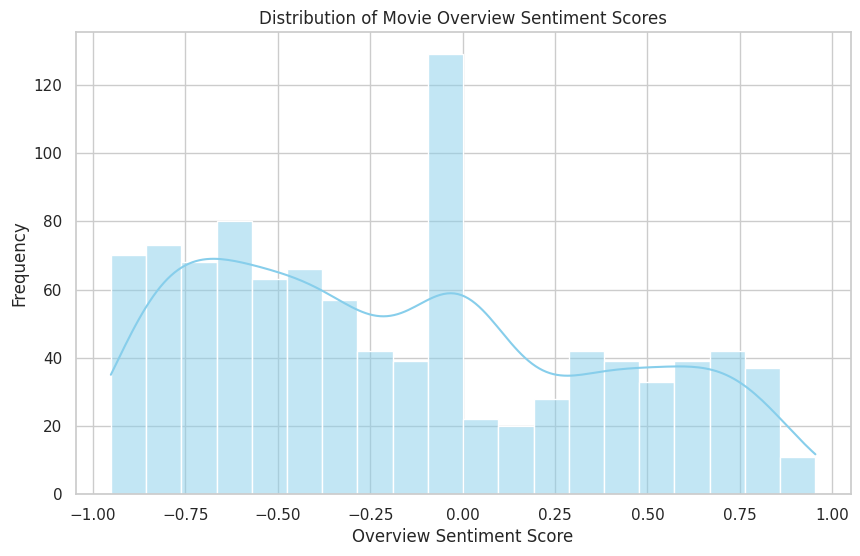

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Overview_Sentiment_Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Movie Overview Sentiment Scores')
plt.xlabel('Overview Sentiment Score')
plt.ylabel('Frequency')
plt.show()

*Categorizing Sentiment Scores*

In [ ]:
# we consider scores > 0 as positive, < 0 as negative, and 0 as neutral
sentiment_threshold = 0

df['Overview_Sentiment_Label'] = df['Overview_Sentiment_Score'].apply(lambda score: 'Positive' if score > sentiment_threshold else ('Negative' if score < sentiment_threshold else 'Neutral'))


display(df[['Movie_Title', 'Overview', 'Overview_Sentiment_Score', 'Overview_Sentiment_Label']].head(5))
print(df['Overview_Sentiment_Label'].value_counts())

,Movie_Title,Overview,Overview_Sentiment_Score,Overview_Sentiment_Label
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,-0.4019,Negative
1,The Godfather,An organized crime dynasty's aging patriarch t...,-0.6705,Negative
2,The Dark Knight,When the menace known as the Joker wreaks havo...,-0.8176,Negative
3,The Godfather: Part II,The early life and career of Vito Corleone in ...,-0.4767,Negative
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,0.5423,Positive


Overview_Sentiment_Label
Negative    582
Positive    313
Neutral     105
Name: count, dtype: int64


**9. Classification Models**

*Categorizing IMDB Rating*

In [ ]:
# thresholds for categorizing IMDB ratings
def categorize_imdb_rating(rating):
    if rating >= 9:
        return 'Excellent'
    elif rating >= 8:
        return 'Good'
    elif rating >= 7:
        return 'Not Bad'
    else:
        return 'Other'

df['IMDB_Rating_Category'] = df['IMDB_Rating'].apply(categorize_imdb_rating)

print("Distribution of IMDB Rating Categories:")
print(df['IMDB_Rating_Category'].value_counts())

display(df[['Movie_Title', 'IMDB_Rating', 'IMDB_Rating_Category']].head(10))

Distribution of IMDB Rating Categories:
IMDB_Rating_Category
Not Bad      537
Good         458
Excellent      5
Name: count, dtype: int64


,Movie_Title,IMDB_Rating,IMDB_Rating_Category
0,The Shawshank Redemption,9.3,Excellent
1,The Godfather,9.2,Excellent
2,The Dark Knight,9.0,Excellent
3,The Godfather: Part II,9.0,Excellent
4,12 Angry Men,9.0,Excellent
5,The Lord of the Rings: The Return of the King,8.9,Good
6,Pulp Fiction,8.9,Good
7,Schindler's List,8.9,Good
8,Inception,8.8,Good
9,Fight Club,8.8,Good


*Prepare Data for Classification*

In [ ]:
from sklearn.impute import SimpleImputer


# We will use numerical and categorical features.
# so choose 'IMDB_Rating', 'Runtime', 'No_of_Votes', 'Decade', 'Movie_Age', 'Overview_Sentiment_Score', 'Certificate', 'Genre' as features.
# The target variable will be 'IMDB_Rating_Category'.

features = ['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Decade', 'Movie_Age', 'Overview_Sentiment_Score', 'Certificate', 'Genre']
target = 'IMDB_Rating_Category'

X = df[features]
y = df[target]

categorical_features = ['Certificate', 'Genre']
numerical_features = ['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Decade', 'Movie_Age', 'Overview_Sentiment_Score']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete.")
print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Data preparation complete.
Shape of training data (X_train): (800, 8)
Shape of testing data (X_test): (200, 8)
Shape of training labels (y_train): (800,)
Shape of testing labels (y_test): (200,)


In [ ]:
# Check for missing values in the training data
print("Missing values in X_train before imputation:")
print(X_train.isnull().sum())

Missing values in X_train before imputation:
IMDB_Rating                 0
Runtime                     0
No_of_Votes                 0
Decade                      1
Movie_Age                   1
Overview_Sentiment_Score    0
Certificate                 0
Genre                       0
dtype: int64


*Implement and Evaluate Classification Models*

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier
# Note: For multi-class classification, precision, recall, and f1-score require specifying an 'average' parameter.
# We'll use 'weighted' to account for class imbalance.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Classifier Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


**Decision Tree Classifier**


Decision Tree Classifier Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


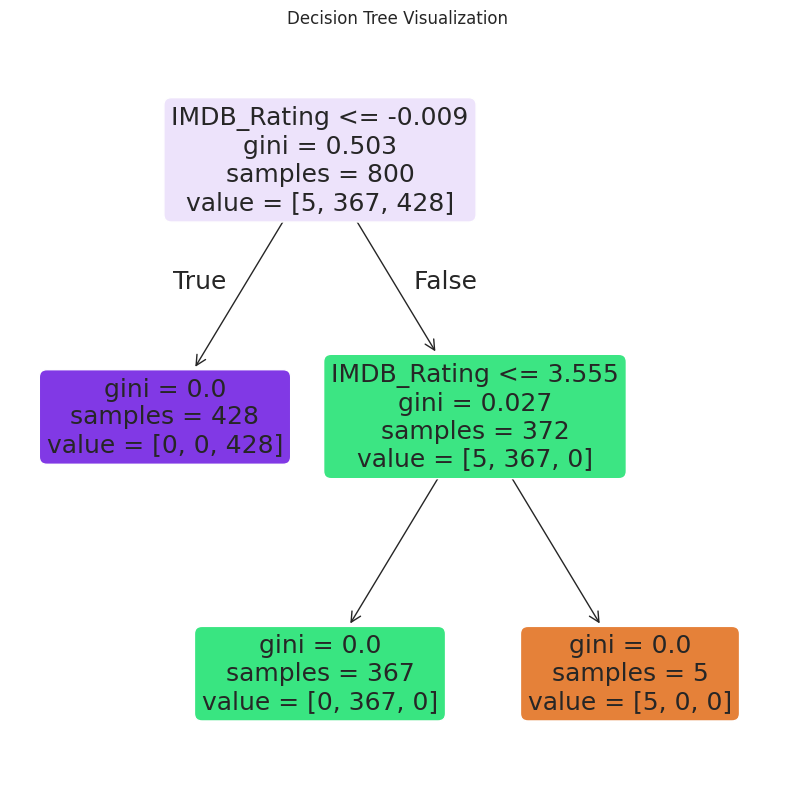

In [ ]:
dt_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the Decision Tree Classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree Classifier
# Note: For multi-class classification, precision, recall, and f1-score require specifying an 'average' parameter.
# We'll use 'weighted' to account for class imbalance.
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print("\nDecision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

plt.figure(figsize=(10,10))
plot_tree(dt_classifier.named_steps['classifier'], feature_names=numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)), filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


nb_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)), # Convert sparse to dense
                                ('classifier', GaussianNB())])

# Train the Naive Bayes Classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Naive Bayes Classifier
# Note: For multi-class classification, precision, recall, and f1-score require specifying an 'average' parameter.
# We'll use 'weighted' to account for class imbalance.
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)


print("\nNaive Bayes Classifier Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")


Naive Bayes Classifier Evaluation:
Accuracy: 0.4350
Precision: 0.5286
Recall: 0.4350
F1-Score: 0.4029


*Visualize Classification Model Performance*

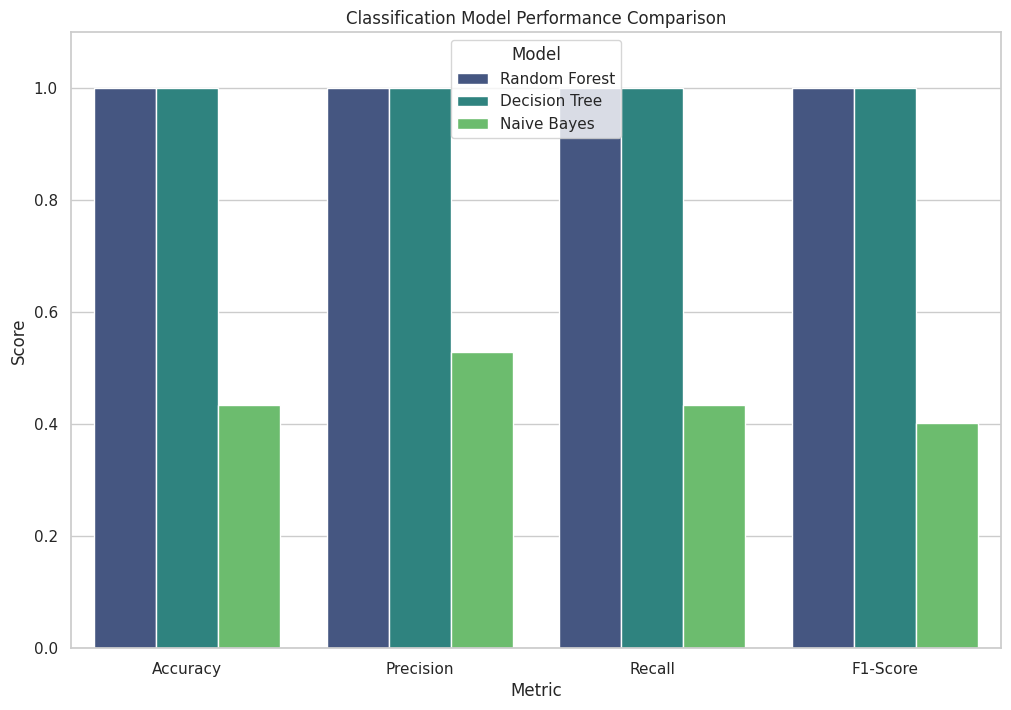

In [ ]:
metrics_data = {
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [accuracy_rf, accuracy_dt, accuracy_nb],
    'Precision': [precision_rf, precision_dt, precision_nb],
    'Recall': [recall_rf, recall_dt, recall_nb],
    'F1-Score': [f1_rf, f1_dt, f1_nb]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Classification Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.show()

**10. Regression Models**

*Prepare Data for Regression*

In [ ]:
# We same features as classification, excluding the target variable itself.
# The target variable will be 'Gross'.

features_reg = ['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Decade', 'Movie_Age', 'Overview_Sentiment_Score', 'Certificate', 'Genre']
target_reg = 'Gross'

X_reg = df[features_reg]
y_reg = df[target_reg]

# We can reuse the preprocessor defined for classification as it handles both numerical and categorical features with imputation and scaling.

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Data preparation for regression complete.")
print("Shape of training data (X_train_reg):", X_train_reg.shape)
print("Shape of testing data (X_test_reg):", X_test_reg.shape)
print("Shape of training labels (y_train_reg):", y_train_reg.shape)
print("Shape of testing labels (y_test_reg):", y_test_reg.shape)

Data preparation for regression complete.
Shape of training data (X_train_reg): (800, 8)
Shape of testing data (X_test_reg): (200, 8)
Shape of training labels (y_train_reg): (800,)
Shape of testing labels (y_test_reg): (200,)


*Implement and Evaluate Regression Models*

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

linear_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

# Train the Linear Regression model
linear_reg_model.fit(X_train_reg, y_train_reg)

# Predict on the test data
y_pred_lr = linear_reg_model.predict(X_test_reg)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")

Linear Regression Evaluation:
RMSE: 86151832.5185
R2 Score: 0.4588


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=42))])

# Train the Random Forest Regressor model
rf_reg_model.fit(X_train_reg, y_train_reg)

# Predict on the test data
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)

# Evaluate the Random Forest Regressor model
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

print("\nRandom Forest Regressor Evaluation:")
print(f"RMSE: {rmse_rf_reg:.4f}")
print(f"R2 Score: {r2_rf_reg:.4f}")


Random Forest Regressor Evaluation:
RMSE: 74828386.6112
R2 Score: 0.5917


**13. Making Predictions with Trained Models**

*Prepare Sample Data for Prediction*

In [ ]:
sample_data = {
    'IMDB_Rating': [8.5],
    'Runtime': [120],
    'No_of_Votes': [500000],
    'Decade': [2010],
    'Movie_Age': [15],
    'Overview_Sentiment_Score': [0.7],
    'Certificate': ['UA'],
    'Genre': ['Action, Adventure, Sci-Fi']
}


sample_df = pd.DataFrame(sample_data)

print("Sample data for prediction:")
display(sample_df)

Sample data for prediction:


,IMDB_Rating,Runtime,No_of_Votes,Decade,Movie_Age,Overview_Sentiment_Score,Certificate,Genre
0,8.5,120,500000,2010,15,0.7,UA,"Action, Adventure, Sci-Fi"


*Predicting with Classification Models*

In [ ]:
# Predict the IMDB Rating Category using the trained classification models

# Random Forest Classifier
rf_prediction = rf_classifier.predict(sample_df)
print(f"Random Forest Classifier Prediction (IMDB Rating Category): {rf_prediction[0]}")

# Decision Tree Classifier
dt_prediction = dt_classifier.predict(sample_df)
print(f"Decision Tree Classifier Prediction (IMDB Rating Category): {dt_prediction[0]}")

# Naive Bayes Classifier
nb_prediction = nb_classifier.predict(sample_df)
print(f"Naive Bayes Classifier Prediction (IMDB Rating Category): {nb_prediction[0]}")

Random Forest Classifier Prediction (IMDB Rating Category): Good
Decision Tree Classifier Prediction (IMDB Rating Category): Good
Naive Bayes Classifier Prediction (IMDB Rating Category): Good


*Predicting with Regression Models*

In [ ]:
# Predict the Gross using the trained regression models

# Linear Regression
lr_prediction = linear_reg_model.predict(sample_df)
print(f"Linear Regression Prediction (Gross): ${lr_prediction[0]:,.2f}")

# Random Forest Regressor
rf_reg_prediction = rf_reg_model.predict(sample_df)
print(f"Random Forest Regressor Prediction (Gross): ${rf_reg_prediction[0]:,.2f}")

Linear Regression Prediction (Gross): $174,688,147.04
Random Forest Regressor Prediction (Gross): $230,714,437.19


**11. Clustering (K-Means)**

*Prepare Data for Clustering*

In [ ]:
clustering_features = ['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Movie_Age', 'Overview_Sentiment_Score']

X_clustering = df[clustering_features].copy()

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_clustering = imputer.fit_transform(X_clustering)

scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

print("Data preparation for clustering complete.")
print("Shape of clustering data:", X_clustering_scaled.shape)

Data preparation for clustering complete.
Shape of clustering data: (1000, 5)


*Apply K-Means Clustering*

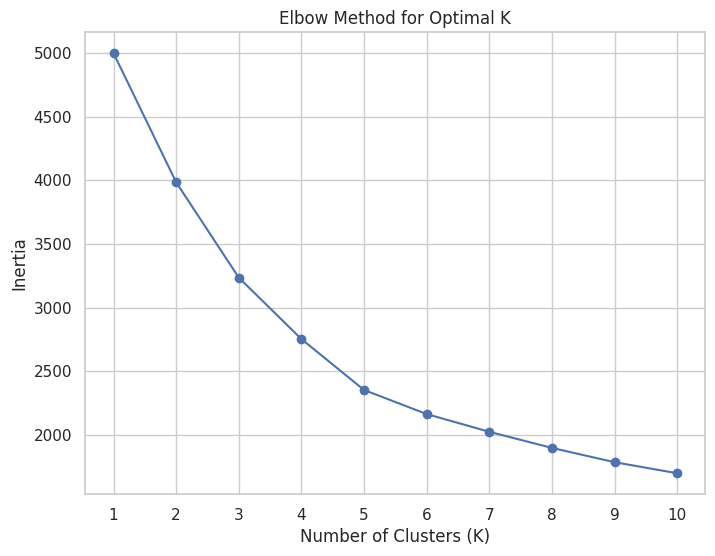

In [ ]:
from sklearn.cluster import KMeans

inertia = []
#range of possible cluster numbers
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

*Visualize Clusters*

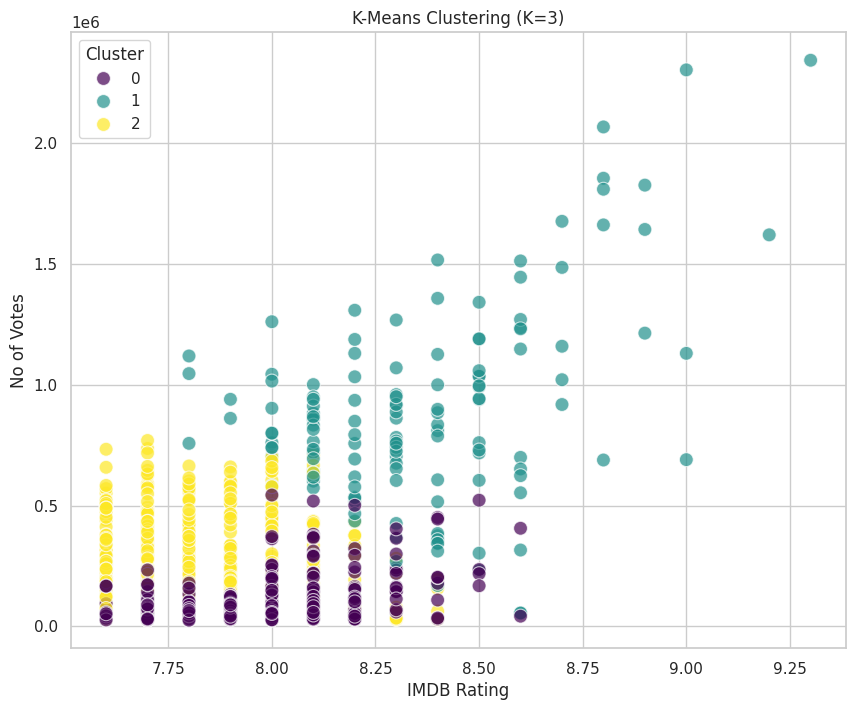


Cluster Centers (Scaled Features):


,IMDB_Rating,Runtime,No_of_Votes,Movie_Age,Overview_Sentiment_Score
0,0.136698,-0.212587,-0.510425,1.392451,-0.070559
1,1.481537,0.562077,1.864293,-0.322571,-0.227972
2,-0.405871,-0.034669,-0.202826,-0.553303,0.084798



Cluster Sizes:
Cluster
0    268
1    138
2    594
Name: count, dtype: int64


In [ ]:
# Let's assume we choose 3 clusters

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clustering_scaled)


df['Cluster'] = clusters

if len(clustering_features) >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df['IMDB_Rating'], y=df['No_of_Votes'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
    plt.title(f'K-Means Clustering (K={n_clusters})')
    plt.xlabel('IMDB Rating')
    plt.ylabel('No of Votes')
    plt.show()
else:
    print("Cannot visualize clusters in 2D with less than 2 features.")

print("\nCluster Centers (Scaled Features):")
display(pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features))

print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

*Cluster Assignment for a Sample Movie*

**Interpretation of Clusters**

Based on the scaled cluster centers, we can interpret the characteristics of the movies in each cluster:

*   **Cluster 0:** This cluster appears to represent **older, less popular movies** with shorter runtimes and slightly less positive overviews.
*   **Cluster 1:** This cluster seems to consist of **highly-rated, popular, and relatively newer movies** with longer runtimes.
*   **Cluster 2:** This cluster likely contains **newer, less popular movies** with average runtimes and slightly more positive overviews.

These interpretations provide a high-level understanding of the movie groupings based on the selected features.

In [ ]:
sample_movie = df.iloc[0]

print(f"The movie '{sample_movie['Movie_Title']}' belongs to Cluster: {sample_movie['Cluster']}")

print("\nFeatures for the sample movie:")
display(sample_movie[clustering_features])

The movie 'The Shawshank Redemption' belongs to Cluster: 1

Features for the sample movie:


,0
IMDB_Rating,9.3
Runtime,142
No_of_Votes,2343110
Movie_Age,31.0
Overview_Sentiment_Score,-0.4019


*Movies within Each Cluster*

In [ ]:
grouped_by_cluster = df.groupby('Cluster')


for cluster_id, cluster_df in grouped_by_cluster:
    print(f"Cluster {cluster_id}:")
    display(cluster_df[['Movie_Title', 'IMDB_Rating', 'Runtime', 'No_of_Votes', 'Movie_Age', 'Overview_Sentiment_Score']].head())
    print("\n")

Cluster 0:


,Movie_Title,IMDB_Rating,Runtime,No_of_Votes,Movie_Age,Overview_Sentiment_Score
30,Seppuku,8.6,133,42004,63.0,-0.7940
32,It's a Wonderful Life,8.6,130,405801,79.0,0.3612
46,Hotaru no haka,8.5,89,235231,37.0,-0.7115
50,Casablanca,8.5,102,522093,83.0,-0.2163
51,Modern Times,8.5,87,217881,89.0,0.0516




Cluster 1:


,Movie_Title,IMDB_Rating,Runtime,No_of_Votes,Movie_Age,Overview_Sentiment_Score
0,The Shawshank Redemption,9.3,142,2343110,31.0,-0.4019
1,The Godfather,9.2,175,1620367,53.0,-0.6705
2,The Dark Knight,9.0,152,2303232,17.0,-0.8176
3,The Godfather: Part II,9.0,202,1129952,51.0,-0.4767
4,12 Angry Men,9.0,96,689845,68.0,0.5423




Cluster 2:


,Movie_Title,IMDB_Rating,Runtime,No_of_Votes,Movie_Age,Overview_Sentiment_Score
53,Capharnaüm,8.4,126,62635,7.0,-0.8779
54,Ayla: The Daughter of War,8.4,125,34112,8.0,-0.9297
55,Vikram Vedha,8.4,147,28401,8.0,-0.8750
56,Kimi no na wa.,8.4,106,194838,9.0,-0.3182
57,Dangal,8.4,161,156479,9.0,0.2960


In [ ]:
score = silhouette_score(X_clustering_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.24138343776152682


**12. Feature Importance and Ranking**

*Feature Importance for Random Forest Classifier*

Top 10 Features by Importance (Random Forest):


,Feature,Importance
0,IMDB_Rating,0.634291
2,No_of_Votes,0.083841
1,Runtime,0.049096
4,Movie_Age,0.037048
5,Overview_Sentiment_Score,0.031495
3,Decade,0.022092
11,Certificate_R,0.008189
143,Genre_Drama,0.005397
12,Certificate_U,0.004709
6,Certificate_A,0.004053


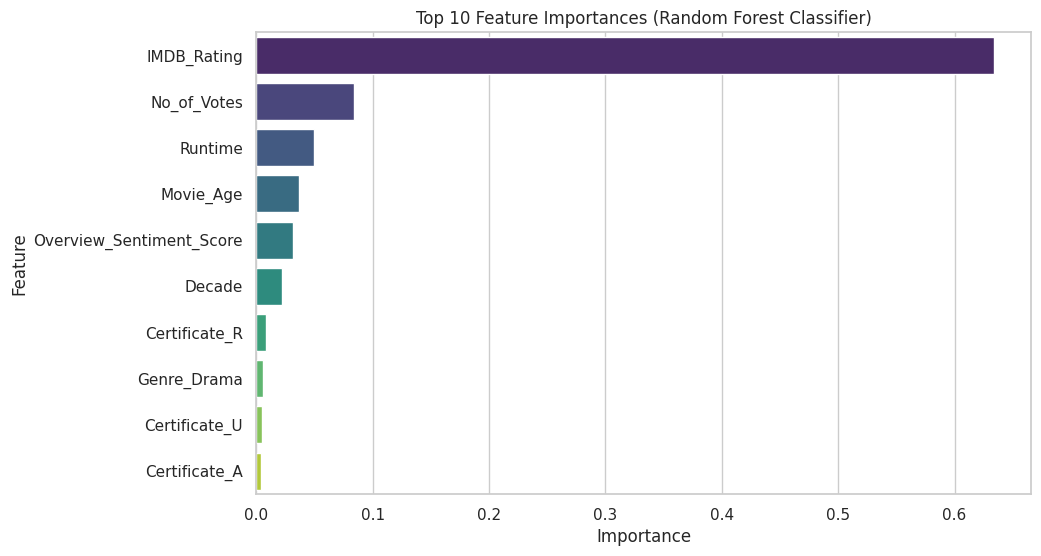

In [ ]:
feature_importances_rf = rf_classifier.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Top 10 Features by Importance (Random Forest):")
display(feature_importance_df_rf.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df_rf.head(10), palette='viridis', legend=False) # Added hue and legend=False
plt.title('Top 10 Feature Importances (Random Forest Classifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

*Feature Importance for Decision Tree Classifier*


Top 10 Features by Importance (Decision Tree):


,Feature,Importance
0,IMDB_Rating,1.0
1,Runtime,0.0
2,No_of_Votes,0.0
3,Decade,0.0
4,Movie_Age,0.0
5,Overview_Sentiment_Score,0.0
6,Certificate_A,0.0
7,Certificate_G,0.0
8,Certificate_Not Rated,0.0
9,Certificate_PG,0.0


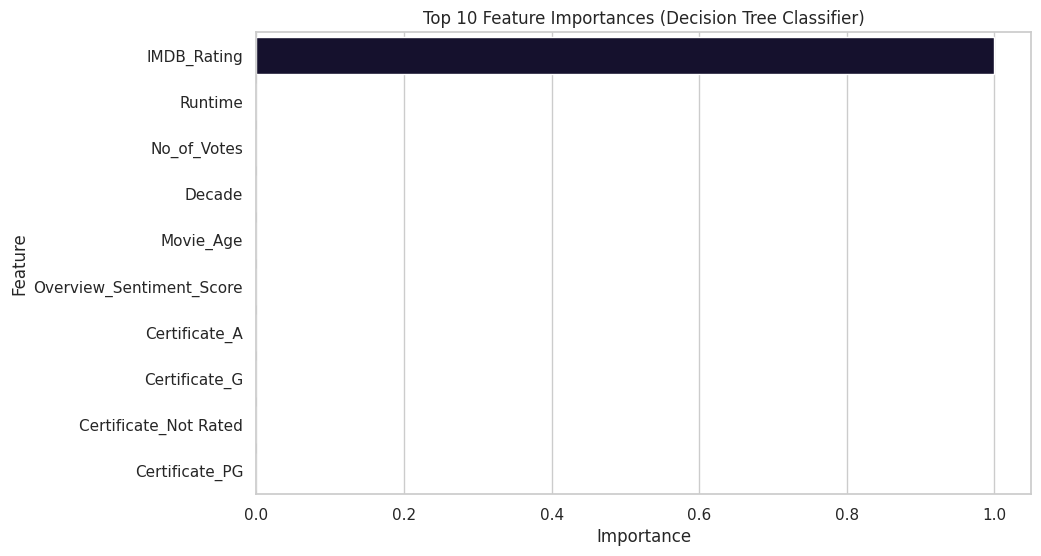

In [ ]:
feature_importances_dt = dt_classifier.named_steps['classifier'].feature_importances_

feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})

# Sort by importance
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

print("\nTop 10 Features by Importance (Decision Tree):")
display(feature_importance_df_dt.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df_dt.head(10), palette='magma', legend=False)
plt.title('Top 10 Feature Importances (Decision Tree Classifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()